In [2]:
import time
import random
import itertools
import numpy as np
import pandas as pd
from scipy import *
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import mnist
from keras.utils import to_categorical

#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

#%matplotlib inline


In [ ]:
def load_keras_data(number_of_inputs=6,scaler=StandardScaler):
    df = pd.read_csv("all_copy.csv", sep=";")
        
    if number_of_inputs == 6:
        x=df.iloc[:,17:23]
        y=df.iloc[:,2:5]
    if number_of_inputs == 12:
        x=df.iloc[:,5:17]
        y=df.iloc[:,2:5]
    
    train_inputs = scaler().fit_transform(x.values)
    training_inputs = [np.reshape(i,number_of_inputs) for i in train_inputs] 
    
    results = []
    var=0
    count=0
    for i in y.values:
        results.append(var)
        if count>=98:
            count=0
            var+=1
        else:
            count+=1
    
    
    data = list(zip(training_inputs, results))
    
    t1,t2,t3=[],[],[]
    import random
    for i in range(0,len(data),99):
        sample=data[i:i+99]
        
        t1.append([sample.pop(random.randrange(len(sample))) for _ in range(70)])
        t2.append([sample.pop(random.randrange(len(sample))) for _ in range(15)])
        t3.append([sample.pop(random.randrange(len(sample))) for _ in range(14)])
    
    t1=np.array(t1).reshape(1750,2)
    t2=np.array(t2).reshape(375,2)
    t3=np.array(t3).reshape(350,2)
    np.random.shuffle(t1)
    np.random.shuffle(t2)
    np.random.shuffle(t3)
    
    x_train,y_train=zip(*t1)
    y_train = to_categorical(y_train)
    x_train = np.array(x_train).reshape((1750,number_of_inputs))
    
    x_test,y_test=zip(*t2)
    y_test = to_categorical(y_test)
    x_test = np.array(x_test).reshape((375,number_of_inputs))
    
    x_val,y_val=zip(*t3)
    y_val = to_categorical(y_val)
    x_val = np.array(x_val).reshape((350,number_of_inputs))
        
    return x_train,y_train,x_test,y_test,x_val,y_val

In [ ]:
x,y,xt,yt,xv,yv = load_keras_data(number_of_inputs=6,scaler=StandardScaler)

In [ ]:
print(np.shape(x))

# Kagome

In [3]:
import networkx as nx

In [4]:
import ipynb.fs.full.NEW_kagome_generator2 as kg

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [ ]:
points = kg.Create_Points(3,3,plot=True,base="star")

# DATA

In [46]:

K = np.linspace(0,1,1000)
#print(K)

X = []
Y = []

repeat = 5
size = 3

for k in K:
    print(k)
    y = []
    x=[]
    for numb,i in enumerate(range(repeat)):

        G,points = kg.Create_Kagome_Graph(size,size,p=1.0,plot=False)

        G = kg.Add_Weights(G,k=k)

        signed_matrix0 = nx.to_numpy_matrix(G)

        x.append(signed_matrix0)

        graphs, weights, signed_matrices = kg.Create_Data([signed_matrix0])

        objs0,solve_time0 = kg.XOR_Model(graphs, weights, signed_matrices)

        y.append(objs0)

    Y.append(y)
    X.append(x)
#Y.append((np.mean(results),np.std(results)))

0.0
0.001001001001001001
0.002002002002002002
0.003003003003003003
0.004004004004004004
0.005005005005005005
0.006006006006006006
0.007007007007007007
0.008008008008008008
0.009009009009009009
0.01001001001001001
0.011011011011011011
0.012012012012012012
0.013013013013013013
0.014014014014014014
0.015015015015015015
0.016016016016016016
0.017017017017017015
0.018018018018018018
0.01901901901901902
0.02002002002002002
0.02102102102102102
0.022022022022022022
0.023023023023023025
0.024024024024024024
0.025025025025025023
0.026026026026026026
0.02702702702702703
0.028028028028028028
0.029029029029029027
0.03003003003003003
0.031031031031031032
0.03203203203203203
0.03303303303303303
0.03403403403403403
0.035035035035035036
0.036036036036036036
0.037037037037037035
0.03803803803803804
0.03903903903903904
0.04004004004004004
0.04104104104104104
0.04204204204204204
0.043043043043043044
0.044044044044044044
0.04504504504504504
0.04604604604604605
0.04704704704704705
0.04804804804804805
0.0490

0.4164164164164164
0.4174174174174174
0.4184184184184184
0.4194194194194194
0.42042042042042044
0.4214214214214214
0.4224224224224224
0.42342342342342343
0.4244244244244244
0.42542542542542544
0.4264264264264264
0.4274274274274274
0.42842842842842843
0.4294294294294294
0.43043043043043044
0.4314314314314314
0.43243243243243246
0.43343343343343343
0.4344344344344344
0.43543543543543545
0.4364364364364364
0.43743743743743746
0.43843843843843844
0.4394394394394394
0.44044044044044045
0.44144144144144143
0.44244244244244246
0.44344344344344344
0.4444444444444444
0.44544544544544545
0.44644644644644643
0.44744744744744747
0.44844844844844844
0.4494494494494494
0.45045045045045046
0.45145145145145144
0.45245245245245247
0.45345345345345345
0.4544544544544544
0.45545545545545546
0.45645645645645644
0.4574574574574575
0.45845845845845845
0.45945945945945943
0.46046046046046046
0.46146146146146144
0.4624624624624625
0.46346346346346345
0.46446446446446443
0.46546546546546547
0.46646646646646645

0.8458458458458459
0.8468468468468469
0.8478478478478478
0.8488488488488488
0.8498498498498498
0.8508508508508509
0.8518518518518519
0.8528528528528528
0.8538538538538538
0.8548548548548548
0.8558558558558559
0.8568568568568569
0.8578578578578578
0.8588588588588588
0.8598598598598598
0.8608608608608609
0.8618618618618619
0.8628628628628628
0.8638638638638638
0.8648648648648649
0.8658658658658659
0.8668668668668669
0.8678678678678678
0.8688688688688688
0.8698698698698699
0.8708708708708709
0.8718718718718719
0.8728728728728729
0.8738738738738738
0.8748748748748749
0.8758758758758759
0.8768768768768769
0.8778778778778779
0.8788788788788788
0.8798798798798799
0.8808808808808809
0.8818818818818819
0.8828828828828829
0.8838838838838838
0.8848848848848849
0.8858858858858859
0.8868868868868869
0.8878878878878879
0.8888888888888888
0.8898898898898899
0.8908908908908909
0.8918918918918919
0.8928928928928929
0.8938938938938938
0.8948948948948949
0.8958958958958959
0.8968968968968969
0.8978978978

In [47]:
for index,(i,j) in enumerate(zip(X,Y)):
    print(index,np.mean(j),np.shape(i))

0 0.0 (5, 52, 52)
1 0.0 (5, 52, 52)
2 0.0 (5, 52, 52)
3 0.8 (5, 52, 52)
4 1.0 (5, 52, 52)
5 1.0 (5, 52, 52)
6 1.0 (5, 52, 52)
7 1.0 (5, 52, 52)
8 1.0 (5, 52, 52)
9 1.6 (5, 52, 52)
10 2.0 (5, 52, 52)
11 2.0 (5, 52, 52)
12 2.0 (5, 52, 52)
13 2.0 (5, 52, 52)
14 2.0 (5, 52, 52)
15 3.0 (5, 52, 52)
16 3.0 (5, 52, 52)
17 2.8 (5, 52, 52)
18 2.8 (5, 52, 52)
19 3.0 (5, 52, 52)
20 3.2 (5, 52, 52)
21 4.0 (5, 52, 52)
22 4.0 (5, 52, 52)
23 4.0 (5, 52, 52)
24 4.0 (5, 52, 52)
25 3.8 (5, 52, 52)
26 4.2 (5, 52, 52)
27 5.0 (5, 52, 52)
28 4.6 (5, 52, 52)
29 4.8 (5, 52, 52)
30 4.8 (5, 52, 52)
31 4.8 (5, 52, 52)
32 5.0 (5, 52, 52)
33 6.0 (5, 52, 52)
34 6.0 (5, 52, 52)
35 6.0 (5, 52, 52)
36 6.0 (5, 52, 52)
37 5.8 (5, 52, 52)
38 6.4 (5, 52, 52)
39 6.4 (5, 52, 52)
40 6.6 (5, 52, 52)
41 6.8 (5, 52, 52)
42 6.6 (5, 52, 52)
43 6.8 (5, 52, 52)
44 6.8 (5, 52, 52)
45 7.6 (5, 52, 52)
46 7.6 (5, 52, 52)
47 8.0 (5, 52, 52)
48 7.8 (5, 52, 52)
49 8.2 (5, 52, 52)
50 8.2 (5, 52, 52)
51 8.6 (5, 52, 52)
52 8.8 (5, 52, 52)
53 

725 38.8 (5, 52, 52)
726 37.0 (5, 52, 52)
727 37.8 (5, 52, 52)
728 37.6 (5, 52, 52)
729 37.0 (5, 52, 52)
730 36.8 (5, 52, 52)
731 37.4 (5, 52, 52)
732 37.2 (5, 52, 52)
733 37.2 (5, 52, 52)
734 36.0 (5, 52, 52)
735 35.8 (5, 52, 52)
736 37.6 (5, 52, 52)
737 35.2 (5, 52, 52)
738 36.8 (5, 52, 52)
739 37.4 (5, 52, 52)
740 38.0 (5, 52, 52)
741 36.8 (5, 52, 52)
742 38.8 (5, 52, 52)
743 38.8 (5, 52, 52)
744 37.4 (5, 52, 52)
745 37.2 (5, 52, 52)
746 36.8 (5, 52, 52)
747 36.0 (5, 52, 52)
748 37.2 (5, 52, 52)
749 37.2 (5, 52, 52)
750 38.6 (5, 52, 52)
751 37.4 (5, 52, 52)
752 36.8 (5, 52, 52)
753 36.6 (5, 52, 52)
754 37.6 (5, 52, 52)
755 38.6 (5, 52, 52)
756 38.8 (5, 52, 52)
757 38.0 (5, 52, 52)
758 38.8 (5, 52, 52)
759 37.2 (5, 52, 52)
760 37.6 (5, 52, 52)
761 36.8 (5, 52, 52)
762 36.4 (5, 52, 52)
763 37.0 (5, 52, 52)
764 37.8 (5, 52, 52)
765 38.8 (5, 52, 52)
766 35.4 (5, 52, 52)
767 36.0 (5, 52, 52)
768 37.4 (5, 52, 52)
769 36.4 (5, 52, 52)
770 36.4 (5, 52, 52)
771 37.0 (5, 52, 52)
772 37.6 (5, 

In [51]:
y=[]
for j in Y:
    y.append(np.mean(j))

In [52]:
print(y)

[0.0, 0.0, 0.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.6, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.8, 2.8, 3.0, 3.2, 4.0, 4.0, 4.0, 4.0, 3.8, 4.2, 5.0, 4.6, 4.8, 4.8, 4.8, 5.0, 6.0, 6.0, 6.0, 6.0, 5.8, 6.4, 6.4, 6.6, 6.8, 6.6, 6.8, 6.8, 7.6, 7.6, 8.0, 7.8, 8.2, 8.2, 8.6, 8.8, 9.0, 8.8, 9.0, 8.8, 9.8, 10.0, 9.6, 9.8, 9.8, 10.8, 10.6, 10.8, 10.8, 10.8, 11.2, 11.8, 11.6, 11.6, 11.8, 12.2, 11.8, 12.0, 12.4, 13.0, 12.2, 12.4, 13.4, 13.2, 13.4, 13.8, 13.8, 13.8, 14.0, 13.8, 14.8, 14.8, 14.0, 14.6, 15.4, 14.0, 14.8, 15.8, 15.8, 16.0, 15.8, 16.4, 16.8, 15.6, 16.0, 17.2, 17.2, 16.8, 17.4, 17.0, 17.4, 17.4, 18.2, 18.2, 18.4, 18.4, 18.8, 18.0, 18.8, 18.6, 19.8, 18.8, 19.8, 18.6, 20.6, 19.4, 20.4, 20.4, 20.2, 19.6, 20.2, 21.4, 20.8, 21.8, 21.2, 21.2, 21.4, 20.8, 20.8, 22.2, 21.8, 22.2, 22.2, 23.2, 22.8, 22.4, 23.4, 23.4, 23.8, 23.4, 23.6, 24.2, 23.4, 24.0, 22.8, 24.8, 24.0, 23.2, 25.4, 24.6, 23.8, 25.2, 26.6, 23.6, 26.4, 26.0, 26.0, 26.6, 26.2, 26.6, 25.6, 27.0, 26.0, 27.4, 26.2, 26.0, 25.6, 27.4, 25.6, 28.0

# DATA SPLIT

In [53]:
from sklearn.model_selection import train_test_split

#X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.1)

#print(np.shape(X_train[0]))

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#X_test, X_val, Y_test, Y_val  = train_test_split(X_test, Y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [54]:
print(np.shape(X_train),np.shape(X_test))#,np.shape(X_val))
print(np.shape(Y_train),np.shape(Y_test))#,np.shape(Y_val))

(900, 5, 52, 52) (100, 5, 52, 52)
(900,) (100,)


In [55]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_val = np.array(X_val)
Y_val= np.array(Y_val)

In [ ]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test )
Y_train = np.asarray(Y_train)
Y_test  = np.asarray(Y_test )
X_val = np.asarray(X_val)
Y_val= np.asarray(Y_val)

In [56]:
for j in Y_train:
    print(j)

35.8
2.0
36.6
24.6
37.2
38.8
35.0
37.4
33.8
40.0
36.4
37.6
37.4
9.6
38.8
25.6
37.4
36.4
18.6
38.6
27.8
37.4
0.8
30.2
36.2
37.6
37.6
36.8
38.2
38.0
36.2
36.0
35.6
0.0
40.0
38.0
36.6
37.2
36.0
36.4
11.8
19.8
37.8
38.0
18.4
38.2
37.0
37.0
37.4
35.4
39.8
39.4
1.0
36.0
8.8
36.4
38.2
36.8
13.8
32.8
26.6
31.0
20.2
37.8
37.2
36.2
34.0
35.2
35.8
29.2
32.8
13.4
37.6
36.0
36.8
32.0
29.4
37.2
37.0
36.2
34.0
8.2
38.0
36.0
38.0
36.8
30.6
32.0
38.8
38.8
37.6
36.6
35.0
37.0
39.6
37.4
38.4
37.8
37.2
32.8
37.4
38.0
39.0
8.0
36.0
36.2
3.0
36.6
37.4
40.4
36.2
36.6
37.6
38.0
38.2
35.2
35.4
27.6
37.4
9.8
36.2
39.8
36.4
37.4
36.0
36.8
17.4
36.0
37.0
37.4
16.8
35.6
36.6
35.6
38.8
37.0
38.4
37.4
26.6
2.0
36.2
14.0
35.6
35.8
37.6
36.4
38.2
35.8
20.8
36.4
36.2
23.6
34.8
36.0
39.0
36.6
38.0
38.0
37.8
36.4
20.6
37.0
28.6
3.0
38.0
36.8
37.6
37.8
36.4
17.0
39.2
4.0
38.6
11.6
38.0
36.8
38.2
35.4
37.0
36.6
35.6
37.6
12.0
34.0
37.4
35.2
37.4
18.2
36.6
38.4
38.6
29.6
36.4
36.4
38.0
38.4
37.2
9.8
37.2
38.0
37.4
37.8
36.4

In [57]:
for i,j in zip(X_train,Y_train):
    print(j)
    for m in i:
        print("\t",np.count_nonzero(m==-1))

35.8
	 113
	 112
	 110
	 109
	 113
2.0
	 4
	 4
	 4
	 4
	 4
36.6
	 304
	 317
	 317
	 302
	 314
24.6
	 54
	 49
	 54
	 53
	 52
37.2
	 143
	 137
	 142
	 145
	 145
38.8
	 285
	 283
	 285
	 285
	 266
35.0
	 92
	 92
	 91
	 89
	 91
37.4
	 185
	 179
	 184
	 179
	 174
33.8
	 80
	 80
	 79
	 77
	 80
40.0
	 318
	 316
	 315
	 322
	 332
36.4
	 159
	 165
	 165
	 159
	 163
37.6
	 259
	 263
	 266
	 269
	 261
37.4
	 309
	 325
	 320
	 322
	 329
9.6
	 19
	 20
	 19
	 20
	 20
38.8
	 298
	 292
	 298
	 299
	 299
25.6
	 55
	 58
	 58
	 59
	 59
37.4
	 235
	 235
	 247
	 236
	 242
36.4
	 154
	 150
	 153
	 149
	 152
18.6
	 40
	 40
	 39
	 42
	 40
38.6
	 268
	 264
	 274
	 269
	 277
27.8
	 61
	 62
	 59
	 58
	 61
37.4
	 103
	 105
	 106
	 105
	 108
0.8
	 2
	 2
	 0
	 2
	 2
30.2
	 65
	 66
	 68
	 66
	 66
36.2
	 148
	 142
	 149
	 146
	 147
37.6
	 234
	 228
	 233
	 233
	 230
37.6
	 272
	 274
	 270
	 267
	 278
36.8
	 247
	 253
	 250
	 242
	 248
38.2
	 210
	 214
	 214
	 210
	 208
38.0
	 241
	 227
	 236
	 236
	 236
36.2
	 185
	 

	 13
	 14
	 13
14.0
	 29
	 29
	 30
	 30
	 30
28.6
	 63
	 64
	 65
	 66
	 64
38.4
	 143
	 141
	 145
	 148
	 146
11.8
	 24
	 24
	 22
	 24
	 24
36.6
	 224
	 227
	 218
	 227
	 221
38.0
	 123
	 127
	 123
	 128
	 126
22.2
	 46
	 48
	 46
	 48
	 45
37.2
	 129
	 131
	 135
	 130
	 127
36.8
	 280
	 279
	 281
	 281
	 282
18.8
	 42
	 39
	 39
	 39
	 40
36.8
	 189
	 188
	 193
	 191
	 189
37.6
	 309
	 310
	 308
	 305
	 318
36.4
	 262
	 270
	 260
	 260
	 268
35.8
	 114
	 119
	 119
	 118
	 117
37.2
	 280
	 272
	 263
	 275
	 269
36.4
	 143
	 146
	 145
	 147
	 144
35.0
	 225
	 220
	 227
	 223
	 223
38.6
	 311
	 322
	 313
	 318
	 311
38.4
	 318
	 312
	 315
	 323
	 311
2.0
	 4
	 4
	 4
	 4
	 4
38.0
	 130
	 126
	 124
	 128
	 130
13.8
	 28
	 28
	 27
	 28
	 28
37.8
	 165
	 165
	 170
	 166
	 166
36.8
	 227
	 239
	 240
	 231
	 233
38.0
	 299
	 306
	 296
	 299
	 295
37.6
	 315
	 310
	 317
	 306
	 320
14.8
	 30
	 30
	 30
	 30
	 30
37.8
	 124
	 123
	 120
	 120
	 123
36.0
	 94
	 90
	 90
	 91
	 92
26.0
	 57
	 60
	 55
	

	 85
	 82
	 85
	 81
38.2
	 283
	 289
	 290
	 288
	 293
38.8
	 271
	 262
	 270
	 270
	 269
38.6
	 135
	 136
	 142
	 139
	 136
36.8
	 282
	 280
	 281
	 287
	 287
26.6
	 56
	 56
	 56
	 53
	 56
38.4
	 292
	 290
	 297
	 295
	 301
37.0
	 295
	 280
	 293
	 288
	 288
38.0
	 272
	 280
	 284
	 273
	 275
13.8
	 28
	 28
	 28
	 28
	 27
37.6
	 243
	 245
	 236
	 237
	 242
36.6
	 100
	 97
	 97
	 100
	 96
11.6
	 23
	 24
	 24
	 23
	 24
36.0
	 204
	 199
	 206
	 208
	 206
37.8
	 216
	 231
	 227
	 226
	 222
37.6
	 311
	 309
	 318
	 305
	 312
37.2
	 313
	 329
	 320
	 331
	 323
37.8
	 302
	 313
	 308
	 308
	 303
37.2
	 239
	 238
	 244
	 249
	 238
20.2
	 44
	 42
	 44
	 42
	 40
36.4
	 272
	 287
	 285
	 280
	 288
0.0
	 0
	 0
	 0
	 0
	 0
38.8
	 299
	 302
	 302
	 303
	 312
37.8
	 187
	 183
	 185
	 178
	 185
37.0
	 209
	 203
	 193
	 208
	 200
36.0
	 101
	 104
	 106
	 101
	 107
34.6
	 188
	 196
	 201
	 192
	 200
37.0
	 138
	 137
	 136
	 135
	 140
26.2
	 57
	 56
	 58
	 58
	 53
36.8
	 137
	 142
	 139
	 138
	 143
37.0

	 274
	 284
38.0
	 122
	 119
	 123
	 124
	 130
36.4
	 110
	 110
	 105
	 112
	 109
37.0
	 238
	 235
	 237
	 225
	 226
22.8
	 49
	 48
	 48
	 51
	 51
38.0
	 321
	 324
	 318
	 326
	 307
35.2
	 102
	 101
	 101
	 103
	 100
29.6
	 65
	 65
	 63
	 66
	 66
36.8
	 197
	 198
	 194
	 198
	 200
35.2
	 115
	 117
	 122
	 113
	 120
32.6
	 82
	 82
	 82
	 82
	 83
37.8
	 264
	 268
	 270
	 273
	 266
14.8
	 30
	 30
	 30
	 30
	 30
37.4
	 262
	 243
	 253
	 249
	 254
36.0
	 220
	 216
	 225
	 219
	 219
37.6
	 309
	 305
	 312
	 302
	 296
36.4
	 261
	 266
	 262
	 261
	 259
35.6
	 137
	 140
	 138
	 143
	 141
36.8
	 98
	 98
	 100
	 93
	 96
36.6
	 217
	 212
	 217
	 214
	 214
26.6
	 55
	 57
	 56
	 56
	 56
38.2
	 203
	 198
	 202
	 201
	 203
38.4
	 319
	 319
	 311
	 312
	 329
25.4
	 52
	 54
	 51
	 54
	 54
38.0
	 122
	 121
	 121
	 120
	 119
39.2
	 130
	 130
	 131
	 126
	 131
35.4
	 92
	 92
	 94
	 94
	 95
19.6
	 41
	 42
	 43
	 40
	 40
38.8
	 231
	 240
	 244
	 238
	 245
37.8
	 268
	 261
	 260
	 268
	 252
4.0
	 8
	 8
	 8
	

# MODEL

In [58]:
from keras import backend as K

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [60]:
#inputs=6
hidden_units=100
epochs=100
        
net = models.Sequential()
net.add(layers.Dense(hidden_units, activation='relu', input_shape=(np.shape(X_train[0]))))
#net.add(layers.Dense(10, activation='relu'))
#net.add(Dense(20, activation='relu'))
net.add(layers.Dense(1, activation='relu'))
#net.compile(optimizer="rmsprop", loss="mean_squared_error",metrics=["accuracy"])
net.compile(optimizer="rmsprop", loss="mean_squared_error",metrics=[soft_acc])

t0 = time.process_time()
hist = net.fit(X_train, Y_train,epochs=epochs,batch_size=1,validation_data=(X_test, Y_test),verbose=1)
t_elapsed = time.process_time() - t0
print("Elapsed time =",t_elapsed)

Epoch 1/100
900/900 [==============================] - 1s 878us/step - loss: 718.9944 - soft_acc: 0.0199 - val_loss: 67.4123 - val_soft_acc: 0.0480
Epoch 2/100
900/900 [==============================] - 1s 759us/step - loss: 67.5979 - soft_acc: 0.0547 - val_loss: 59.7949 - val_soft_acc: 0.0706
Epoch 3/100
900/900 [==============================] - 1s 764us/step - loss: 57.0629 - soft_acc: 0.0774 - val_loss: 50.6472 - val_soft_acc: 0.0841
Epoch 4/100
900/900 [==============================] - 1s 769us/step - loss: 51.5651 - soft_acc: 0.0964 - val_loss: 47.9947 - val_soft_acc: 0.1312
Epoch 5/100
900/900 [==============================] - 1s 763us/step - loss: 47.1085 - soft_acc: 0.1282 - val_loss: 47.4227 - val_soft_acc: 0.1434
Epoch 6/100
900/900 [==============================] - 1s 764us/step - loss: 46.1006 - soft_acc: 0.1418 - val_loss: 46.8038 - val_soft_acc: 0.1475
Epoch 7/100
900/900 [==============================] - 1s 755us/step - loss: 44.4174 - soft_acc: 0.1437 - val_loss: 4

900/900 [==============================] - 1s 761us/step - loss: 43.8971 - soft_acc: 0.1581 - val_loss: 42.4913 - val_soft_acc: 0.1690
Epoch 57/100
900/900 [==============================] - 1s 775us/step - loss: 40.9084 - soft_acc: 0.1534 - val_loss: 41.6484 - val_soft_acc: 0.1613
Epoch 58/100
900/900 [==============================] - 1s 759us/step - loss: 42.6313 - soft_acc: 0.1621 - val_loss: 41.3216 - val_soft_acc: 0.1438
Epoch 59/100
900/900 [==============================] - 1s 772us/step - loss: 39.2314 - soft_acc: 0.1627 - val_loss: 41.1153 - val_soft_acc: 0.1475
Epoch 60/100
900/900 [==============================] - 1s 786us/step - loss: 41.5781 - soft_acc: 0.1595 - val_loss: 42.0996 - val_soft_acc: 0.1576
Epoch 61/100
900/900 [==============================] - 1s 784us/step - loss: 38.9162 - soft_acc: 0.1646 - val_loss: 41.5337 - val_soft_acc: 0.1347
Epoch 62/100
900/900 [==============================] - 1s 796us/step - loss: 41.7358 - soft_acc: 0.1629 - val_loss: 42.9324 

In [41]:
result = net.evaluate(X_train, Y_train, batch_size=1)
print(result)

90/90 [==============================] - 0s 534us/step - loss: 16.6001 - soft_acc: 0.1040
[16.600122451782227, 0.10401710867881775]


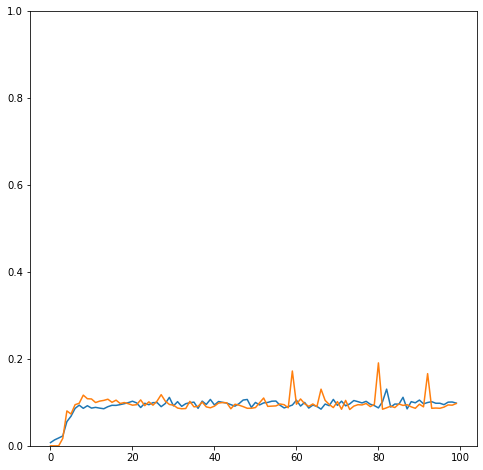

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot([i for i in range(len(hist.history["soft_acc"]))], hist.history["soft_acc"])
plt.plot([i for i in range(len(hist.history["val_soft_acc"]))], hist.history["val_soft_acc"])
plt.ylim(0,1)
plt.show()

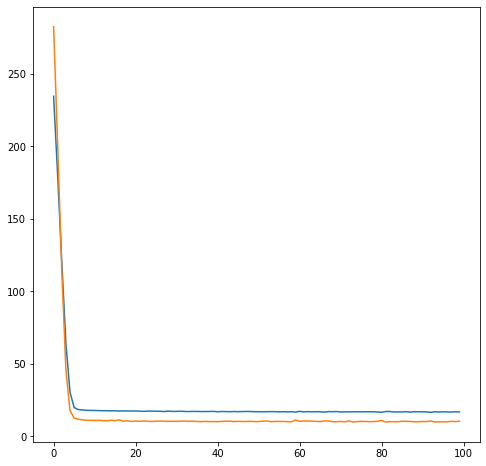

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot([i for i in range(len(hist.history["loss"]))], hist.history["loss"])
plt.plot([i for i in range(len(hist.history["val_loss"]))], hist.history["val_loss"])

In [ ]:
for index,j in enumerate(Y_train):
    print(index,j)

In [18]:
print(Y_train[5])
for m in X_train[5]:
        print("\t",np.count_nonzero(m==-1))


13.4
	 58
	 58
	 58
	 58
	 58


In [34]:
i=78

print(Y_train[i])
for m in X_train[i]:
        print("\t",np.count_nonzero(m==-1))

predictions = net.predict(X_train[i])

print(np.mean(predictions),np.std(predictions))

17.4
	 130
	 130
	 130
	 130
	 130
17.430464 2.7590046


In [25]:
print(np.mean(predictions)-np.std(predictions),np.mean(predictions),np.mean(predictions)+np.std(predictions))

10.796192 13.207159 15.618126


In [39]:
for i in range(0,len(Y_val)):

    print(Y_val[i])
    for m in X_val[i]:
            print("\t",np.count_nonzero(m==-1))

    predictions = net.predict(X_val[i])

    print(np.mean(predictions),np.std(predictions))

14.8
	 60
	 60
	 60
	 60
	 60
13.391716 2.6284401
15.0
	 118
	 118
	 118
	 118
	 118
16.653332 2.821673
14.2
	 66
	 66
	 66
	 66
	 66
13.685278 2.7687037


In [37]:
print(Y_val)

[14.8 15.  14.2]
